<h1>Python pipeline for IGOR binary recordings (ibw-files)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Preparations" data-toc-modified-id="Preparations-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Preparations</a></span></li><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exercise 1</a></span></li></ul></div>

## Preparations
Please install the following two packages in the Anaconda packages manager:

- neo ([neuralensemble.org/neo](http://neuralensemble.org/neo/), [Paper](https://biomedical-engineering-online.biomedcentral.com/articles/10.1186/s12938-017-0419-7))
- igor ([pypi.org/project/igor](https://pypi.org/project/igor/))

and download from the shared Nextcloud folder:

- Data/Igor_1 

## Exercise 1

1. Create a new script, that reads in all IGOR binary _ibw_-files into a variable called, e.g., `filenames`. Hint: You can use the method we have introduced in Chapter 2.4, _Python pipeline for a basic time series analysis_. Print out all read filenames.
2. Use the function `sorted` to sort the filenames in ascending order. Hint: Look-up the usage of `sorted` e.g. on [python.org](https://docs.python.org/3/howto/sorting.html) or [realpython.com](https://realpython.com/python-sort/). What do you notice?

In [42]:
# Your solution 2.1-2.2 here:


file list (sorted): ['ad1_1.ibw', 'ad1_10.ibw', 'ad1_11.ibw', 'ad1_12.ibw', 'ad1_13.ibw', 'ad1_14.ibw', 'ad1_15.ibw', 'ad1_16.ibw', 'ad1_17.ibw', 'ad1_18.ibw', 'ad1_19.ibw', 'ad1_2.ibw', 'ad1_3.ibw', 'ad1_4.ibw', 'ad1_5.ibw', 'ad1_6.ibw', 'ad1_7.ibw', 'ad1_8.ibw', 'ad1_9.ibw']


<details>
<summary><strong>Toggle solution</strong></summary>

```python
# Solution 2.1-2.2:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import os
from neo import io

file_path = "Data/igor_1/"
file_names = [file for file in os.listdir(file_path) \
              if file.endswith('.ibw')]
file_names = sorted(file_names)
print(f"file list (sorted): {file_names}")
``` 
<script src="https://gist.github.com/username/a39a422ebdff6e732753b90573100b16.js"></script>
</details>

Let's see how the IGOR files look like:

In [2]:
test_file = os.path.join(file_path, file_names[0])
test_igor_read = io.IgorIO(test_file).read_analogsignal()

Please try out the following commands in your console, one after another:

In [3]:
test_igor_read

AnalogSignal with 1 channels of length 20000; units dimensionless; datatype float64 
name: 'ad1_1'
annotations: {'note': b'BASELINE=-59.885831\rBASESUBTRACTED=0.000000\rREJECT=0.000000\rSTEP=0.000000'}
sampling rate: 25.0 1/s
time: 0.0 s to 800.0 s

In [4]:
test_igor_read.shape

(20000, 1)

In [5]:
test_igor_read.sampling_rate

array(25.) * 1/s

In [6]:
np.array(test_igor_read.sampling_rate) # 1/s

array(25.)

In [7]:
test_igor_read.times

array([0.0000e+00, 4.0000e-02, 8.0000e-02, ..., 7.9988e+02, 7.9992e+02,
       7.9996e+02]) * s

3. Iterate over all `filenames` and read each IGOR file by using the following command:

    `current_igor_read = io.IgorIO(filepath).read_analogsignal()`
    
    Plot each read IGOR trace into one figure by plotting `current_igor_read.times` vs. `current_igor_read`. Save this figure to disk. Adjust an appropriate figure aspect ratio and provide useful labels and legends.    
4. In order to plot the average of all traces, we need to store each individual trace into a 2D numpy array, e.g. called `all_igor_reads`. Please recap our corresponding solution from Chapter 2.4, _Python pipeline for a basic time series analysis_ and apply it to the current problem. Then calculate the grand average over all traces within the same figure.

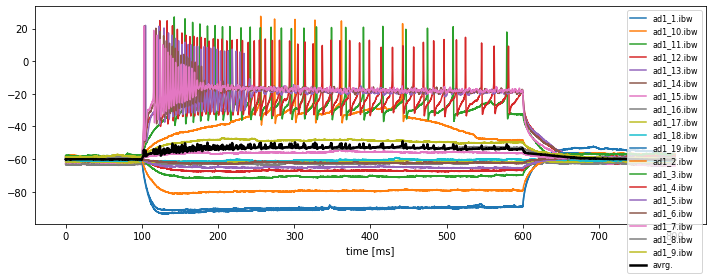

<Figure size 432x288 with 0 Axes>

In [43]:
# Your solution 2.3 and 2.4 here:


<details>
<summary><strong>Toggle solution</strong></summary>

```python
# Solution 2.3 and 2.4:
all_igor_reads = np.empty((test_igor_read.shape[0], 0))

fig = plt.figure(1, figsize=(10,4))
plt.clf()
# for i, file in enumerate(file_names):
for file in file_names:

    current_file = os.path.join(file_path, file)
    current_igor_read = io.IgorIO(current_file).read_analogsignal()

    all_igor_reads = \
      np.append(all_igor_reads, current_igor_read.as_array(), axis=1)

    """ You can calculate the time-array manually,

    current_sampling_rate=np.array(current_igor_read.sampling_rate)
    current_time_array = np.arange(current_igor_read.shape[0]) /
                            current_sampling_rate
    plt.plot(current_time_array, current_igor_read, label=file)

    or use the .times attribute of the read-in igor file:
    """
    plt.plot(current_igor_read.times, current_igor_read, label=file)

plt.plot(current_igor_read.times, all_igor_reads.mean(axis=1), lw=2.5, c="k", label="avrg.")
plt.xlabel("time [ms]")
plt.legend(loc="best",fontsize=8)
plt.tight_layout()
plt.show()
plt.savefig(file_path + " overview.pdf")
``` 
</details>

5. In order to kick-out traces without signifcant action potential spikings, we need to threshold the data: 
    - copy your solution from 2.3 and 2.4 into a new cell. 
    - rename the variable `all_igor_reads` into, e.g., `thresholed_igor_reads` and define a threshold `kick_out_threshold = -40`.
    - change the plotting procedure in that way, that only traces with a maximum magnitude above `kick_out_threshold` are plotted.
    - store these thresholded traces into the array `thresholed_igor_reads`.

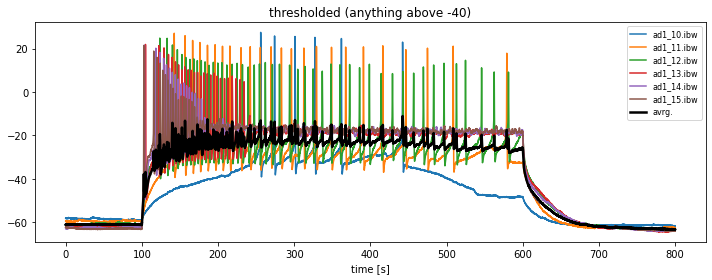

['ad1_10.ibw', 'ad1_11.ibw', 'ad1_12.ibw', 'ad1_13.ibw', 'ad1_14.ibw', 'ad1_15.ibw']


<Figure size 432x288 with 0 Axes>

In [44]:
# Your solution 5 here:


<details>
<summary><strong>Toggle solution</strong></summary>

```python
# Solution 2.5
thresholed_igor_reads = np.empty((test_igor_read.shape[0], 0))
thresholed_igor_names = []
kick_out_threshold = -40

fig = plt.figure(2, figsize=(10, 4))
plt.clf()
# for i, file in enumerate(file_names):
for file in file_names:

    current_file = os.path.join(file_path, file)
    current_igor_read = io.IgorIO(current_file).read_analogsignal()

    #print(current_igor_read.shape)
    # thresholding:
    if np.max(current_igor_read) >= kick_out_threshold:
    #if np.mean(current_igor_read.as_array()[3000:15000]) >= kick_out_threshold:
        plt.plot(current_igor_read.times, current_igor_read, 
                 label=file)

        thresholed_igor_reads = np.append(thresholed_igor_reads, 
                                          current_igor_read.as_array(), 
                                          axis=1)
        #thresholed_igor_reads_times = np.append(thresholed_igor_reads_times, 
        #                              current_igor_read.times)
        thresholed_igor_names = thresholed_igor_names + [file]


plt.plot(current_igor_read.times, thresholed_igor_reads.mean(axis=1), lw=2.5, c="k", label="avrg.")
plt.xlabel("time [s]")
plt.title(f"thresholded (anything above {kick_out_threshold})")
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()
plt.savefig(file_path + " overview thresholded.pdf")
print(thresholed_igor_names)
``` 
</details>

6. In order to detect the prominent spikes in each trace, we will apply the `find_peaks` function from the `scipy` package: 
    - please make yourself a bit familiar with the `find_peaks` function on [scipy.org](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html).
    - create a new cell and apply the `find_peaks` function to the previously thresholded traces stored in `thresholed_igor_reads`. Define a minimum threshold for the peak detection of `spike_threshold = -10`.

Empty DataFrame
Columns: []
Index: []


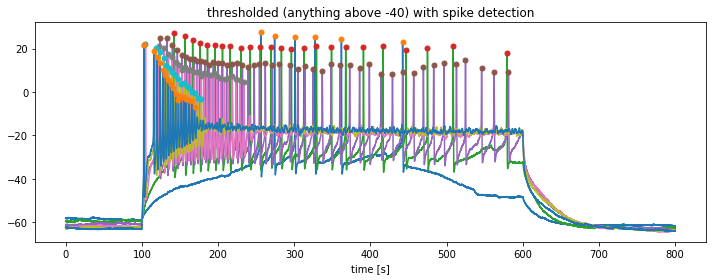

<Figure size 432x288 with 0 Axes>

In [45]:
# Your solution 2.6 here:


<details>
<summary><strong>Toggle solution</strong></summary>

```python
# Solution 2.6
from scipy.signal import find_peaks

spike_threshold = -10

df_out = pd.DataFrame() # initiliaze an empty Pandas DataFrame
print(df_out)

fig = plt.figure(3, figsize=(10, 4))
plt.clf()
for trace in range(thresholed_igor_reads.shape[1]):

    current_spike_mask, _ = find_peaks(thresholed_igor_reads[:,trace],
                                       height=spike_threshold)

    plt.plot(current_igor_read.times,
             thresholed_igor_reads[:, trace].flatten())

    plt.plot(current_igor_read.times[current_spike_mask],
             thresholed_igor_reads[current_spike_mask, trace].flatten(), '.', ms=10)

    # Now, we fill our empty DataFram with the peak-time points
    #   of each trace:
    df_out = pd.concat([df_out, 
                        pd.DataFrame(current_igor_read.times[current_spike_mask], 
                                    columns=[thresholed_igor_names[trace]])],
                       axis=1)
    
    #print(f"peak times: {current_igor_read.times[current_spike_mask]}")


plt.xlabel("time [s]")
plt.title(f"thresholded (anything above {kick_out_threshold}) with spike detection")
plt.tight_layout()
plt.show()
plt.savefig(file_path + " overview thresholded and spikes.pdf")

# at the end, let's save our new DataFrame as an Excel-File:
df_out.to_excel("my_peaks.xlsx")
``` 
</details>